In [ ]:
#-------------------------------ËØªÂèñÊï∞ÊçÆÈõÜ------------------------------

In [45]:
#ÂØºÂÖ•ÂåÖÔºå‰æùËµñÁöÑÁéØÂ¢É
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools

In [46]:
#ÊãøÊï∞ÊçÆ
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [47]:
#ÁúãËÆ≠ÁªÉÈõÜÁâπÂæÅ
train_data.shape

(1460, 81)

In [48]:
#Êï∞ÊçÆÈõÜ~Â∞ëÁöÑ‰∏Ä‰∏™Â∞±ÊòØÊàø‰ª∑Ê†áÁ≠æ
test_data.shape

(1459, 80)

In [49]:
#ÂèñÂâçÂõõË°åÔºåÂâçÂõõÂêé‰∫åÁâπÂæÅÂä†‰∏äÂîÆ‰ª∑Ê†áÁ≠æÔºådisplay
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000

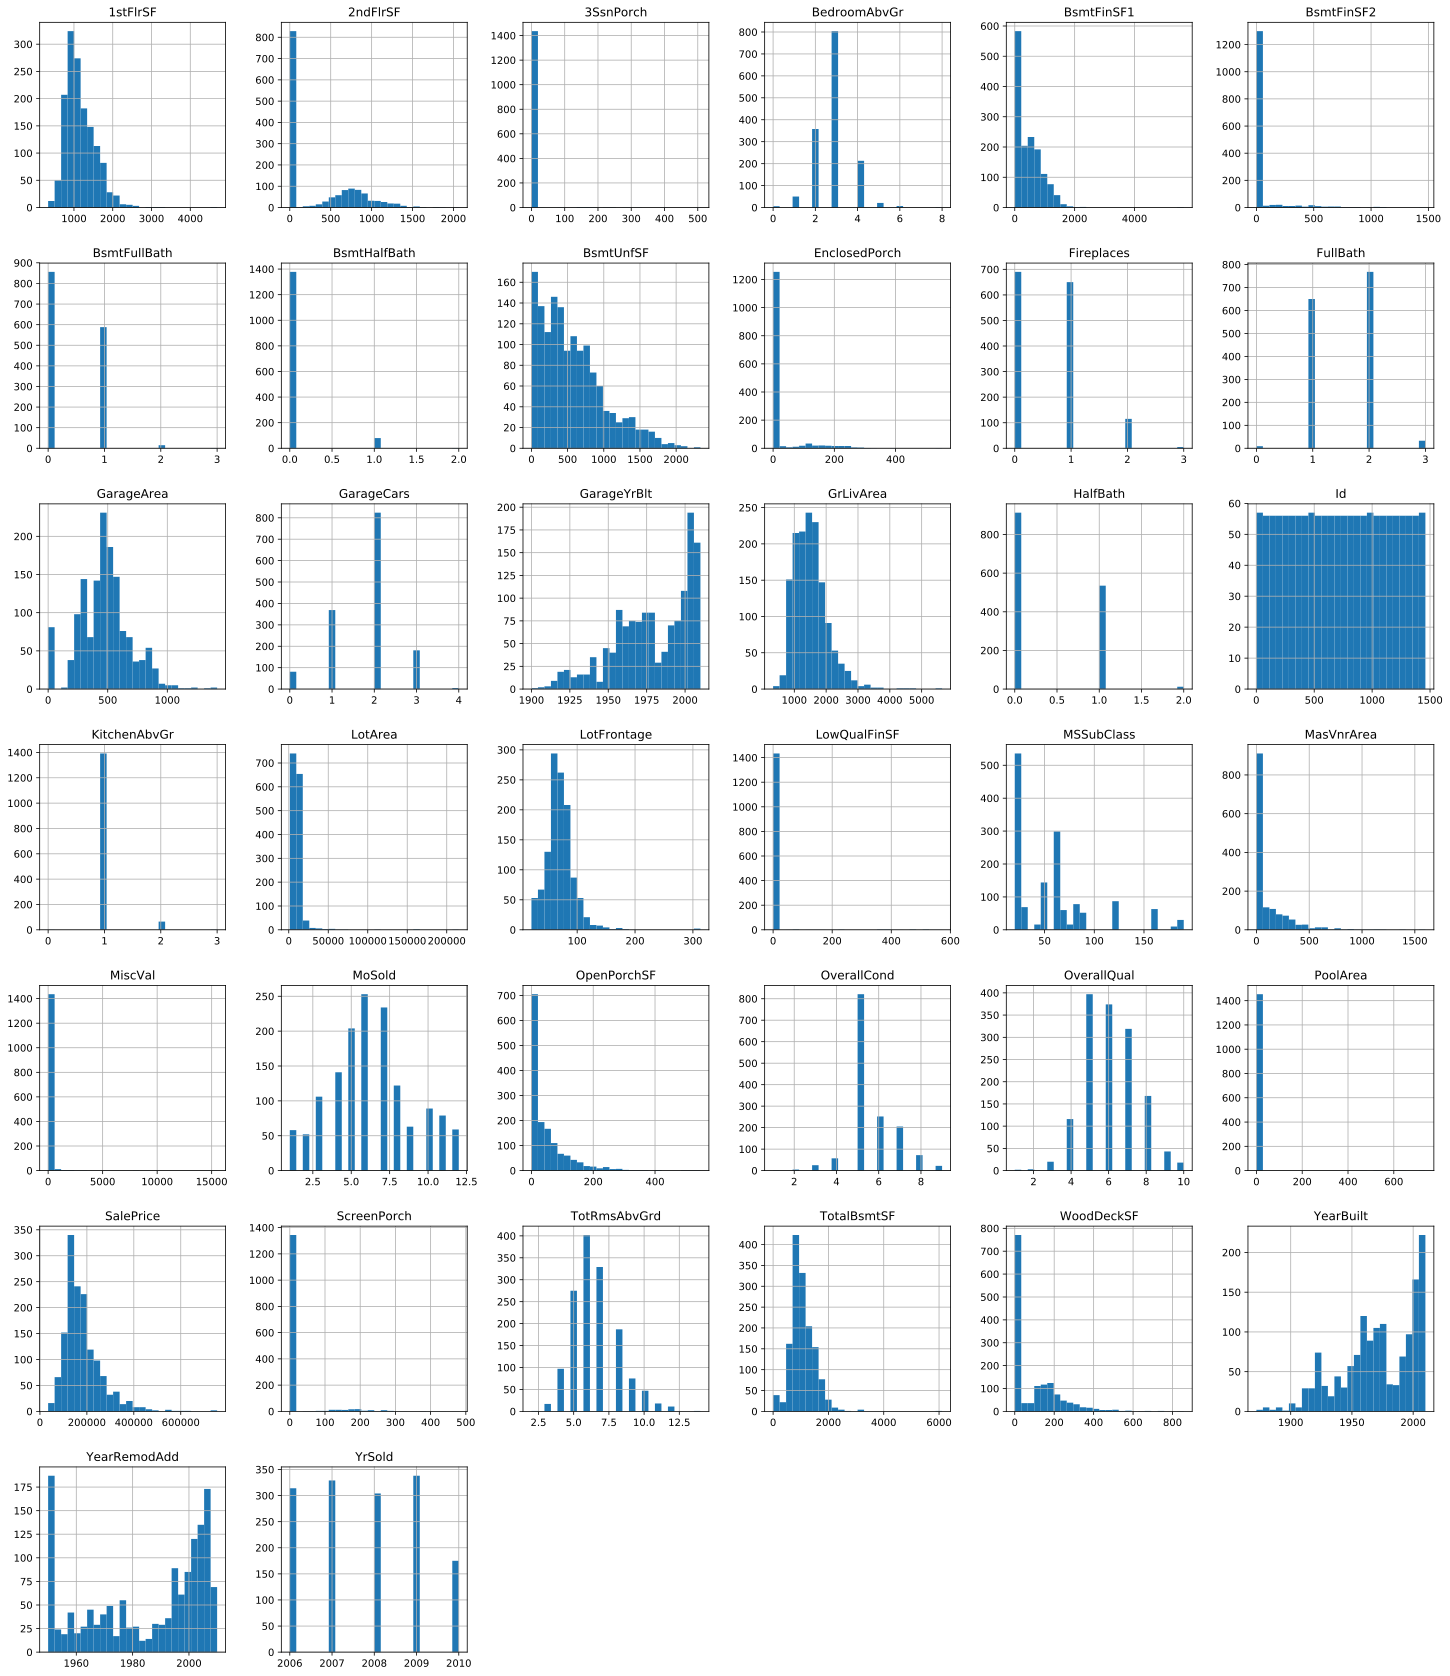

In [52]:
#ÁâπÂæÅÁöÑÁõ¥ÊñπÂõæÔºåÊâæÂÖ≥ËÅî
import matplotlib.pyplot as plt
train_data.hist(bins=26, figsize=(25,30))
plt.show()

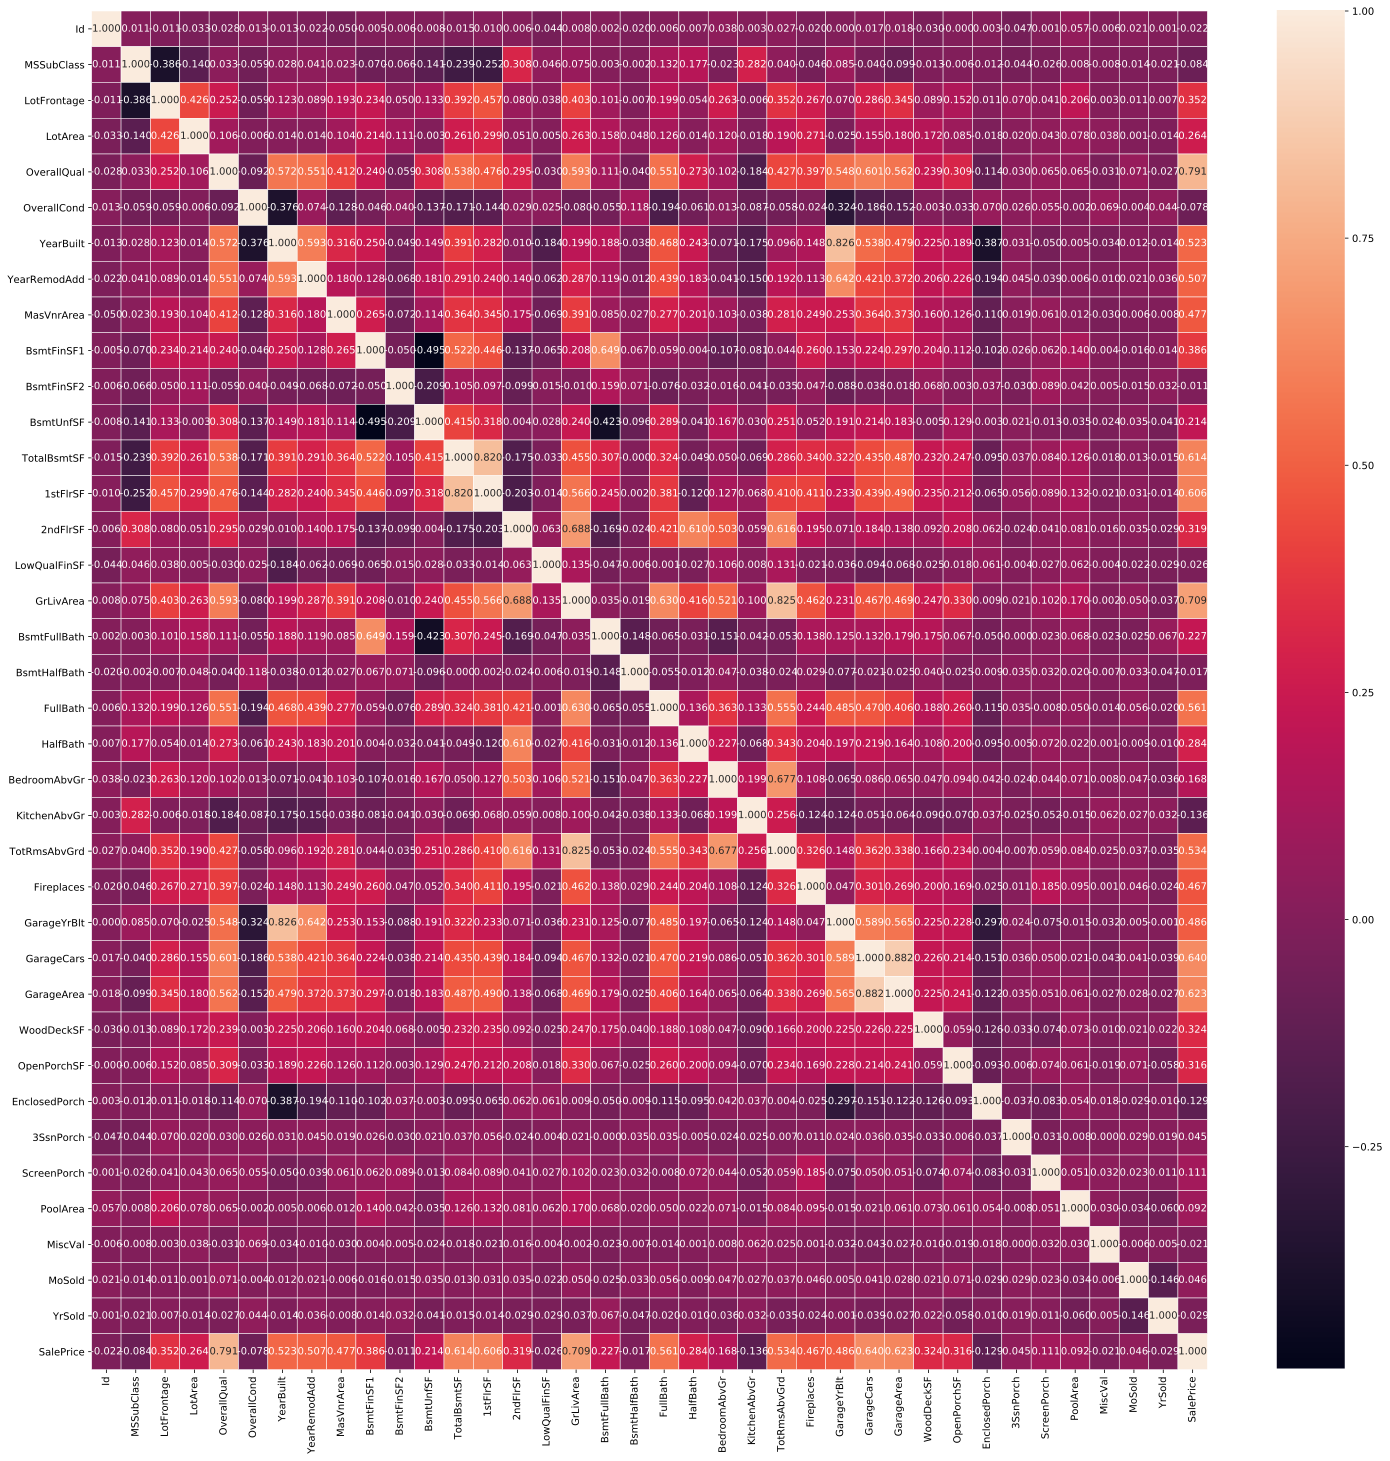

In [53]:
#ÁâπÂæÅÁÉ≠ÂäõÂõæÔºå‰Ω†ÁåúÁåúÁúãÈ¢úËâ≤Ê∑±Ë°®Á§∫ÂÖ≥ËÅîÂ§ßËøòÊòØÈ¢úËâ≤ÊµÖ
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train_data.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.show()

In [50]:
#Â∞ÜÊâÄÊúâÁöÑËÆ≠ÁªÉÊï∞ÊçÆÂíåÊµãËØïÊï∞ÊçÆÁöÑ79‰∏™ÁâπÂæÅÊåâÊ†∑Êú¨ËøûÁªì„ÄÇ
#ÔºüÔºå‰∏ç‰ΩøÁî®IDÊù•ËÆ≠ÁªÉÔºåÈöæ‰ª•Êé®ÂπøÂà∞ÊµãËØïÈõÜ
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [ ]:
#------------------------------------È¢ÑÂ§ÑÁêÜÊï∞ÊçÆÈõÜ-----------------------------------

In [54]:
#ËÆæËØ•ÁâπÂæÅÂú®Êï¥‰∏™Êï∞ÊçÆÈõÜ‰∏äÁöÑÂùáÂÄº‰∏∫ Œº ÔºåÊ†áÂáÜÂ∑Æ‰∏∫ œÉ „ÄÇËØ•ÁâπÂæÅÁöÑÊØè‰∏™ÂÄºÂÖàÂáèÂéª Œº ÂÜçÈô§‰ª• œÉ ÂæóÂà∞Ê†áÂáÜÂåñÂêéÁöÑÊØè‰∏™ÁâπÂæÅÂÄº„ÄÇ
#Áº∫Â§±ÁâπÂæÅÂÄºÊõøÊç¢ÊàêËØ•ÁâπÂæÅÁöÑÂùáÂÄº„ÄÇ
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Ê†áÂáÜÂåñÂêéÔºåÊØè‰∏™ÁâπÂæÅÁöÑÂùáÂÄºÂèò‰∏∫0ÔºåÊâÄ‰ª•ÂèØ‰ª•Áõ¥Êé•Áî®0Êù•ÊõøÊç¢Áº∫Â§±ÂÄº
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [ ]:
#--------------------------------------------------------------------------------
#‰∏æ‰∏™‰æãÂ≠êÔºåÂÅáËÆæÁâπÂæÅMSZoningÈáåÈù¢Êúâ‰∏§‰∏™‰∏çÂêåÁöÑÁ¶ªÊï£ÂÄºRLÂíåRMÔºå
#ÈÇ£‰πàËøô‰∏ÄÊ≠•ËΩ¨Êç¢Â∞ÜÂéªÊéâMSZoningÁâπÂæÅÔºåÂπ∂Êñ∞Âä†‰∏§‰∏™ÁâπÂæÅMSZoning_RLÂíåMSZoning_RMÔºåÂÖ∂ÂÄº‰∏∫0Êàñ1„ÄÇ
#Â¶ÇÊûú‰∏Ä‰∏™Ê†∑Êú¨ÂéüÊù•Âú®MSZoningÈáåÁöÑÂÄº‰∏∫RLÔºåÈÇ£‰πàÊúâMSZoning_RL=1‰∏îMSZoning_RM=0„ÄÇ
#---------------------------------------------------------------------------------
#üëá

In [55]:
# dummy_na=TrueÂ∞ÜÁº∫Â§±ÂÄº‰πüÂΩì‰ΩúÂêàÊ≥ïÁöÑÁâπÂæÅÂÄºÂπ∂‰∏∫ÂÖ∂ÂàõÂª∫ÊåáÁ§∫ÁâπÂæÅ
#AKA‰øùÁïôÂàÜÁ±ªÂèòÈáè‰∏≠ÁöÑÁº∫Â§±ÂÄºÔºåÂ∞ÜÂÖ∂ÂçïÁã¨‰Ωú‰∏∫‰∏ÄÂàó
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape
#331Êàë‰∏çËß£Èáä‰∫ÜÔºå‰∏çÁü•ÈÅìÊÄé‰πàÊù•ÁöÑÊää‰∏äÈù¢ÂçïÁã¨Ê≥®ÈáäÂ•ΩÂ•ΩÁúãÁúã

(2919, 331)

In [56]:
#ÈÄöËøávaluesÂ±ûÊÄßÂæóÂà∞NumPyÊ†ºÂºèÁöÑÊï∞ÊçÆÔºåÂπ∂ËΩ¨ÊàêNDArrayÊñπ‰æøÂêéÈù¢ÁöÑËÆ≠ÁªÉ„ÄÇ
n_train = train_data.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(train_data.SalePrice.values).reshape((-1, 1))

In [65]:
#------------------------------ËÆ≠ÁªÉÊ®°Âûã-------------------------------------

In [57]:
#Âü∫Êú¨ÁöÑÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÂíåÂπ≥ÊñπÊçüÂ§±ÂáΩÊï∞Êù•ËÆ≠ÁªÉÊ®°Âûã
loss = gloss.L2Loss()

def get_net():
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    return net

In [58]:
#Âà´ÈóÆRmseÊòØÂï•ÔºåÈóÆÂ∞±ÁôæÂ∫¶ÔºåËøô‰πàÁÇπÂ§ßÁ©∫Èó¥Ëß£Èáä‰∏ç‰∫Ü
def log_rmse(net, features, labels):
    # Â∞ÜÂ∞è‰∫é1ÁöÑÂÄºËÆæÊàê1Ôºå‰ΩøÂæóÂèñÂØπÊï∞Êó∂Êï∞ÂÄºÊõ¥Á®≥ÂÆö
    clipped_preds = nd.clip(net(features), 1, float('inf'))
    rmse = nd.sqrt(2 * loss(clipped_preds.log(), labels.log()).mean())
    return rmse.asscalar()

In [59]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    # ËøôÈáå‰ΩøÁî®‰∫ÜAdam‰ºòÂåñÁÆóÊ≥ï
    # Âà´ÈóÆÔºåÈóÆÂ∞±ÊòØÂØπÂ≠¶‰π†ÁéáÁõ∏ÂØπ‰∏çÈÇ£‰πàÊïèÊÑü
    #ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç‰øùÊåÅÂçï‰∏ÄÁöÑÂ≠¶‰π†ÁéáÔºàÂç≥ alphaÔºâÊõ¥Êñ∞ÊâÄÊúâÁöÑÊùÉÈáçÔºåÂ≠¶‰π†ÁéáÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠Âπ∂‰∏ç‰ºöÊîπÂèòÔºõÂØπÔºåÂ∞±ÊòØ‰Ω†Â§©Â§©ËÉΩÁúãËßÅÁöÑSGD
    #Adam ÈÄöËøáËÆ°ÁÆóÊ¢ØÂ∫¶ÁöÑ‰∏ÄÈò∂Áü©‰º∞ËÆ°Âíå‰∫åÈò∂Áü©‰º∞ËÆ°ËÄå‰∏∫‰∏çÂêåÁöÑÂèÇÊï∞ËÆæËÆ°Áã¨Á´ãÁöÑËá™ÈÄÇÂ∫îÊÄßÂ≠¶‰π†Áéá„ÄÇ
    trainer = gluon.Trainer(net.collect_params(), 'adam', {
        'learning_rate': learning_rate, 'wd': weight_decay})
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [60]:
#K Êäò‰∫§ÂèâÈ™åËØÅ
#ËøôÁé©ÊÑèÈÄâÊã©Ê®°ÂûãËÆæËÆ°Âπ∂Ë∞ÉËäÇË∂ÖÂèÇÊï∞
#ÂáΩÊï∞ËøîÂõûÁ¨¨iÊäò‰∫§ÂèâÈ™åËØÅÊó∂ÊâÄÈúÄË¶ÅÁöÑËÆ≠ÁªÉÂíåÈ™åËØÅÊï∞ÊçÆ
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = nd.concat(X_train, X_part, dim=0)
            y_train = nd.concat(y_train, y_part, dim=0)
    return X_train, y_train, X_valid, y_valid

In [61]:
#ËÆ≠ÁªÉ k Ê¨°Âπ∂ËøîÂõûËÆ≠ÁªÉÂíåÈ™åËØÅÁöÑÂπ≥ÂùáËØØÂ∑Æ
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse',
                         range(1, num_epochs + 1), valid_ls,
                         ['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f'
              % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

In [ ]:
#-----------------------------------Ê®°ÂûãÈÄâÊã©---------------------------------------

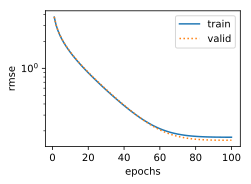

fold 0, train rmse 0.169764, valid rmse 0.157185
fold 1, train rmse 0.162185, valid rmse 0.189614
fold 2, train rmse 0.163556, valid rmse 0.168052
fold 3, train rmse 0.167778, valid rmse 0.154549
fold 4, train rmse 0.162644, valid rmse 0.182778
5-fold validation: avg train rmse 0.165185, avg valid rmse 0.170436


In [62]:
#‰ΩøÁî®‰∏ÄÁªÑÊú™ÁªèË∞É‰ºòÁöÑË∂ÖÂèÇÊï∞Âπ∂ËÆ°ÁÆó‰∫§ÂèâÈ™åËØÅËØØÂ∑Æ„ÄÇÂèØ‰ª•ÊîπÂä®Ëøô‰∫õË∂ÖÂèÇÊï∞Êù•Â∞ΩÂèØËÉΩÂáèÂ∞èÂπ≥ÂùáÊµãËØïËØØÂ∑Æ„ÄÇ
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f'
      % (k, train_l, valid_l))
#ÊúâÊó∂ÂÄôËÆ≠ÁªÉËØØÂ∑ÆÂèØ‰ª•ËææÂà∞Âæà‰ΩéÔºå‰ΩÜÊòØÂú® k Êäò‰∫§ÂèâÈ™åËØÅ‰∏äÁöÑËØØÂ∑ÆÂèØËÉΩÂèçËÄåËæÉÈ´ò
#‰Ω†ÁåúÁåúÁúãËøôÊòØËøáÊãüÂêàËøòÊòØÊ¨†ÊãüÂêà
#ÊÄª‰πãÔºåÂΩìËÆ≠ÁªÉËØØÂ∑ÆÈôç‰ΩéÊó∂ÔºåÊàë‰ª¨Ë¶ÅËßÇÂØü k Êäò‰∫§ÂèâÈ™åËØÅ‰∏äÁöÑËØØÂ∑ÆÊòØÂê¶‰πüÁõ∏Â∫îÈôç‰Ωé

In [63]:
#ÂÆö‰πâÈ¢ÑÊµãÂáΩÊï∞„ÄÇÂú®È¢ÑÊµã‰πãÂâçÔºå‰ΩøÁî®ÂÆåÊï¥ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÈõÜÊù•ÈáçÊñ∞ËÆ≠ÁªÉÊ®°ÂûãÔºåÂπ∂Â∞ÜÈ¢ÑÊµãÁªìÊûúÂ≠òÊàêÊèê‰∫§ÊâÄÈúÄË¶ÅÁöÑÊ†ºÂºè
#Ëá≥‰∫éÊâÄÈúÄË¶ÅÁöÑÊ†ºÂºèÊòØÂï•ÔºåËá™Â∑±ÁúãÂÆòÁΩëhttps://www.kaggle.com/c/house-prices-advanced-regression-techniques
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).asnumpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

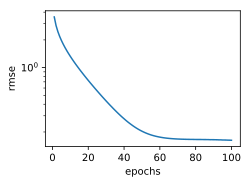

train rmse 0.162559


In [64]:
#ËÆæËÆ°Â•ΩÊ®°ÂûãÂπ∂Ë∞ÉÂ•ΩË∂ÖÂèÇÊï∞‰πãÂêéÔºå‰∏ã‰∏ÄÊ≠•Â∞±ÊòØÂØπÊµãËØïÊï∞ÊçÆÈõÜ‰∏äÁöÑÊàøÂ±ãÊ†∑Êú¨ÂÅö‰ª∑Ê†ºÈ¢ÑÊµã„ÄÇ
#Â¶ÇÊûúÂæóÂà∞‰∏é‰∫§ÂèâÈ™åËØÅÊó∂Â∑Æ‰∏çÂ§öÁöÑËÆ≠ÁªÉËØØÂ∑ÆÔºåÈÇ£‰πàËøô‰∏™ÁªìÊûúÂæàÂèØËÉΩÊòØÁêÜÊÉ≥ÁöÑÔºåÈÇ£Â∞±ÁªìÈ°πÂëó
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)